In [61]:
#Importing dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pickle

In [52]:
# Load your data into a Pandas DataFrame
data = pd.read_csv("heighttoweight.csv")

In [53]:
#Exploratory Data Analysis: checking for missing values

df = pd.DataFrame(data)

# Method 1: Using isnull().sum()
total_missing = df.isnull().sum().sum()  # Count total missing values

# Method 2: Using missing values count per column
missing_per_col = df.isnull().sum()

total_missing

missing_per_col


Index     0
Height    0
Weight    0
dtype: int64

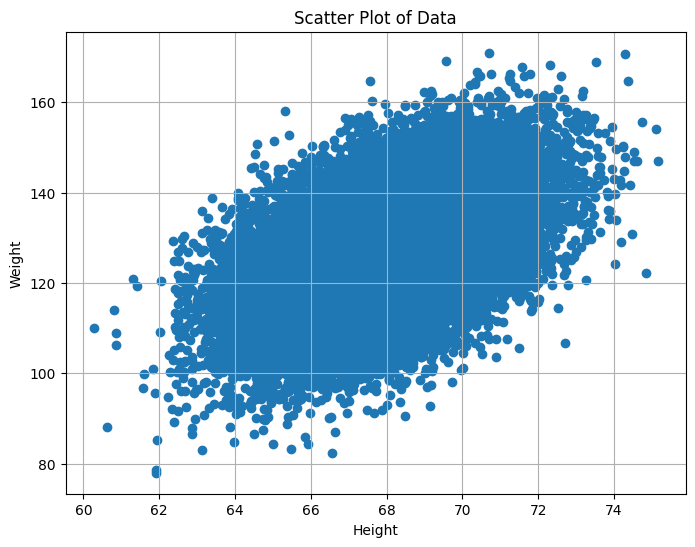

In [59]:
#Data Processing: Checking for outliers

# Extract data for the scatterplot
x = df['Height']
y = df['Weight']

# Create the scatterplot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(x, y)

# Optional: Add labels and title
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter Plot of Data')

# Show the plot
plt.grid(True)
plt.show()

In [40]:
# Separate features (independent variables) and target (dependent variable)
features = df["Height"]  # Assuming height is the independent variable
target = d["Weight"]  # Assuming weight is the dependent variable

In [41]:
#Data Preprocessing: Normalization
# Create the MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the features (height)
scaled_features = scaler.fit_transform(features.values.reshape(-1, 1))  # Reshape for compatibility


In [42]:
# Split data into training and testing sets (usually 80/20 split)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [43]:
# Create the linear regression model
model = LinearRegression()

In [44]:
# Train the model on the training data
model.fit(X_train.values.reshape(-1, 1), y_train)  # Reshape X_train for compatibility

LinearRegression()

In [45]:
# Make predictions on the testing data
y_predicted = model.predict(X_test.values.reshape(-1, 1))  # Reshape X_test for compatibility

In [46]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-Squared:", r2)

Mean Squared Error (MSE): 102.48790963792534
R-Squared: 0.26059113512888576


In [47]:
# Print the coefficients (slope and intercept)
print("Coefficients:", model.coef_[0], model.intercept_)

Coefficients: 3.0712450092256396 -81.73686228241515


In [48]:
# Use the model to predict weight for a new height value (example)
new_height = 180  # Enter your desired height
predicted_weight = model.predict([[new_height]])[0]
print("Predicted weight for", new_height, "cm:", predicted_weight)

Predicted weight for 180 cm: 471.0872393782


In [62]:
# Save the model to a file
with open('smartheightoweightmodel.pkl', 'wb') as f:
  pickle.dump(model, f)

In [65]:
# Load the model
with open('smarweightmodel.pkl', 'rb') as f:
  weight_model = pickle.load(f)

In [67]:
# New height data (replace with your actual value)
new_height = 65.78331  # In centimeters (or adjust units based on your model)

# Make prediction
predicted_weight = weight_model.predict([[new_height]])[0]
print("Predicted weight for", new_height, "cm:", predicted_weight)

Predicted weight for 65.78331 cm: 120.29980024542796
